In [76]:
import pandas as pd
from sklearn.datasets import load_digits

In [77]:
digits = load_digits()
X = pd.DataFrame(digits.data)
y = pd.DataFrame(digits.target)
y = y.values.reshape(1797)

In [78]:
from sklearn.model_selection import train_test_split


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 0)
#y_train = y_train.values.reshape(1257)

In [80]:
X_train.shape, y_train.shape

((1257, 64), (1257,))

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
model = KNeighborsClassifier()

In [83]:
model.fit(X_train, y_train)
          

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [84]:
pred = model.predict(X_test)

In [85]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits = 10, random_state = 7)

results = model_selection.cross_val_score(model,X,y,cv= kfold,scoring = "accuracy")
results.sum()/10

0.9738485412787089

In [86]:
from sklearn.metrics import classification_report
report = classification_report(y_test,pred)
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        45
          1       0.98      0.98      0.98        52
          2       0.98      0.98      0.98        53
          3       0.98      0.98      0.98        54
          4       1.00      0.98      0.99        48
          5       0.96      0.96      0.96        57
          6       0.97      1.00      0.98        60
          7       0.96      1.00      0.98        53
          8       1.00      0.95      0.97        61
          9       0.98      0.98      0.98        57

avg / total       0.98      0.98      0.98       540



In [87]:
data = pd.DataFrame({'actual':y_test,'pred':pred})
data.head()

,actual,pred
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6


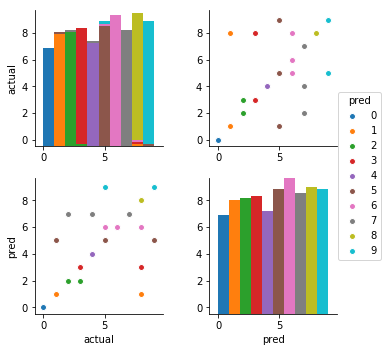

In [88]:
sns.pairplot(data = data,hue = 'pred')
plt.show()

In [65]:
results = model_selection.cross_val_score(model,X,y,cv = kfold,scoring='neg_log_loss')
results.sum()/10

-0.20916221370203658

In [89]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  1  0  0  0  0]
 [ 0  0 52  0  0  0  0  1  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  1  0  0  1  0 58  0]
 [ 0  0  0  0  0  1  0  0  0 56]]


In [91]:
model.score(X_test,y_test)

0.98148148148148151